<a href="https://colab.research.google.com/github/amyas-lab/Machine-Learning-Models/blob/main/Recruitment_prediction_model_using_Decision_Tree_and_Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
- This project is to develop a model for predicting potential candidates from a pool of training program attendants, using Decision Tree.
- The data used is 'data-employee-recruitment.csv'. It is composed of attributes such as employee gender, education level, company size to develop an employee recruitment prediction model

# Part 1: Coding Tasks

##1.1. Load the data set, data cleaning and data analysis:

In [ ]:

# Import pandas library
import pandas as pd
import numpy as np

#Import necessary library for visualizastion
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv("data-employee-recruitment.csv")
data

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,33060,0.698,Female,No relevent experience,Part time course,Graduate,Other,3,10/49,Funded Startup,1,14,0.0
2131,28729,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,10000+,NGO,1,94,0.0
2132,11669,0.926,Male,Has relevent experience,Full time course,Masters,STEM,19,50-99,Pvt Ltd,4,27,0.0
2133,32932,0.895,Male,Has relevent experience,Part time course,Masters,Other,>20,1000-4999,Pvt Ltd,>4,18,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevent_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


In [ ]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,2135.000000,2135.000000,2135.000000,2135.000000
mean,18059.164403,0.756329,65.296956,0.515222
std,9474.072705,0.145332,63.639919,0.499885
min,13.000000,0.450000,-5.000000,0.000000
25%,10631.000000,0.624000,22.000000,0.000000
50%,18450.000000,0.743000,45.000000,1.000000
75%,26543.500000,0.910000,87.500000,1.000000
max,33349.000000,1.026000,336.000000,1.000000


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

## Data Cleaning


In [ ]:
# This data set contains many features that show inconsistent representation

# Standardize company_size
data['company_size'] = data['company_size'].replace({
    '10/49': '10-49',
    '<10': '1-9',
    '100-500': '100-499',
    '500-999': '500-999',
    '1000-4999': '1000-4999',
    '5000-9999': '5000-9999',
    '10000+': '10000+'
})

# Convert 'never' in last_new_job to 0
data['last_new_job'] = data['last_new_job'].replace('never', 0)

# Convert '>4' in last_new_job to 5 (assuming >4 means 5 or more years)
data['last_new_job'] = data['last_new_job'].replace('>4', 5)

# Convert experience to numerical, replacing '<1' with 0 and '>20' with 21
data['experience'] = data['experience'].replace({'<1': 0, '>20': 21})
data['experience'] = pd.to_numeric(data['experience'])
data['last_new_job'] = pd.to_numeric(data['last_new_job'])


# Convert relevent_experience into relevant_experience
data.rename(columns={'relevent_experience': 'relevant_experience'}, inplace=True)

# Display the first few rows to check the changes
display(data.head())

,enrollee_id,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,0,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-499,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,0,50-99,Early Stage Startup,1,52,1.0


For this project, the type of the features may be confusing and important to be predetermined clearly before running the model.

Numerical feautures:
- enrollee_id
- city_development index
- experience (in years)
- last_new_job (in years, with >4 years being denoted as 5)
- training_hours (in hours)

Categorical features:
- gender
- relevant_experience
- enrolled_university
- education_level
- major_discipline
- company type
- company size (this is special, we will treat it as an ordinal categorical feature and will be handled with one-hot encoding later)

## Data Visualization

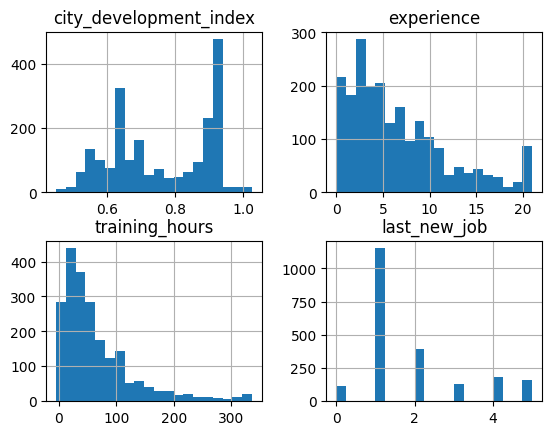

In [ ]:
# Histogram for numerical features
numerical_features = ['city_development_index', 'experience', 'training_hours', 'last_new_job']
data[numerical_features].hist(bins=20)
plt.show()

# Since last_new_job is discrete in its nature, its histogram might look weirr
# However, the distribution of last_new_job is still neededs

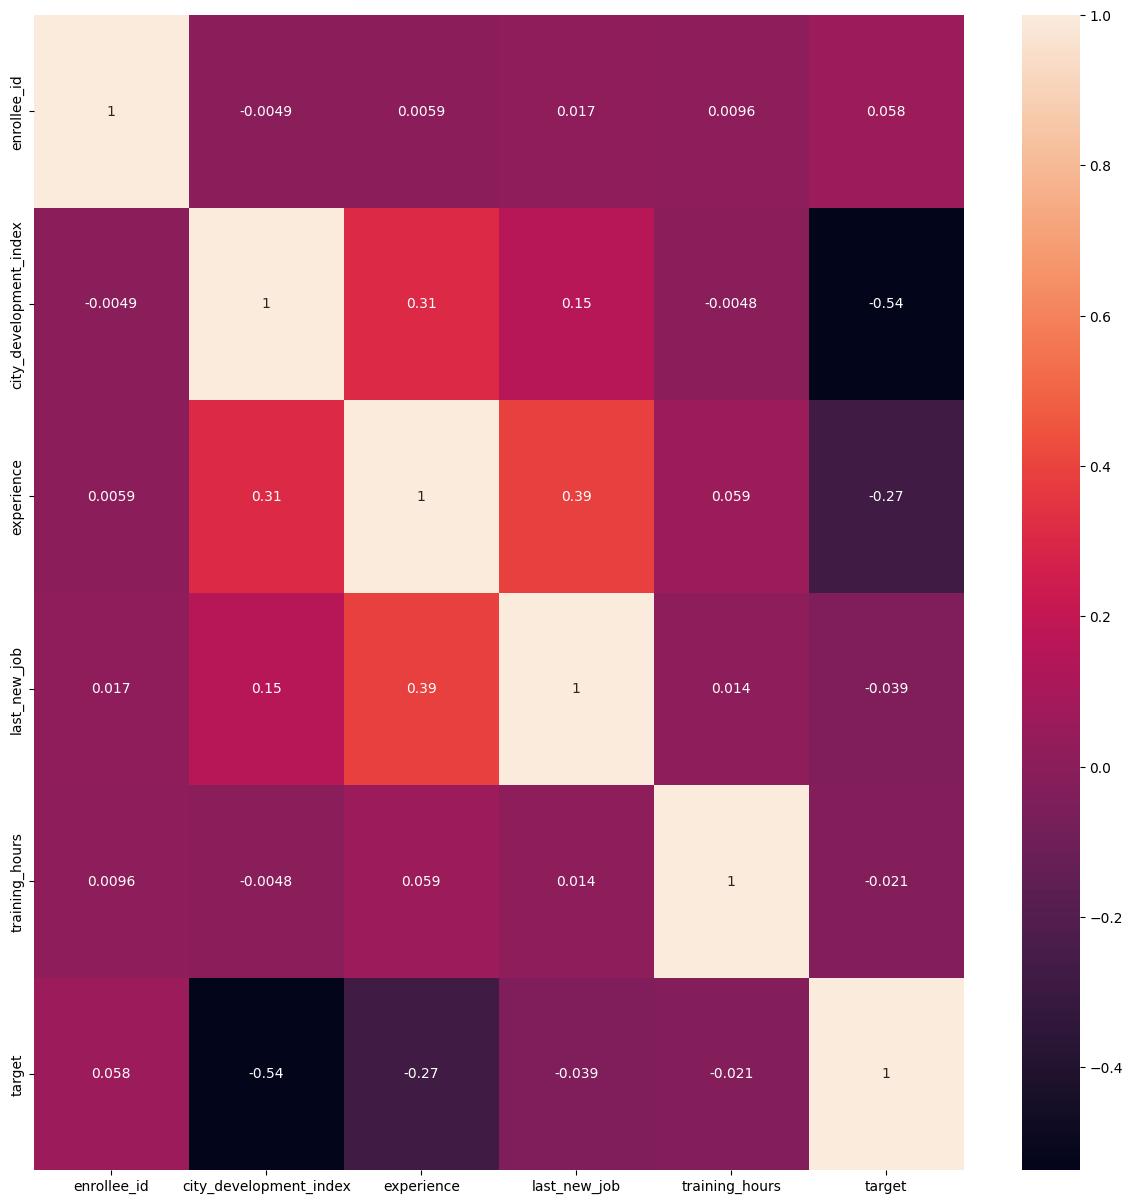

In [ ]:
# We need a correlation heatmap to approximate the relationship between the numerical features to the target feature
# Correlation heat map of numerical features to target
plt.figure(figsize=(15,15))
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

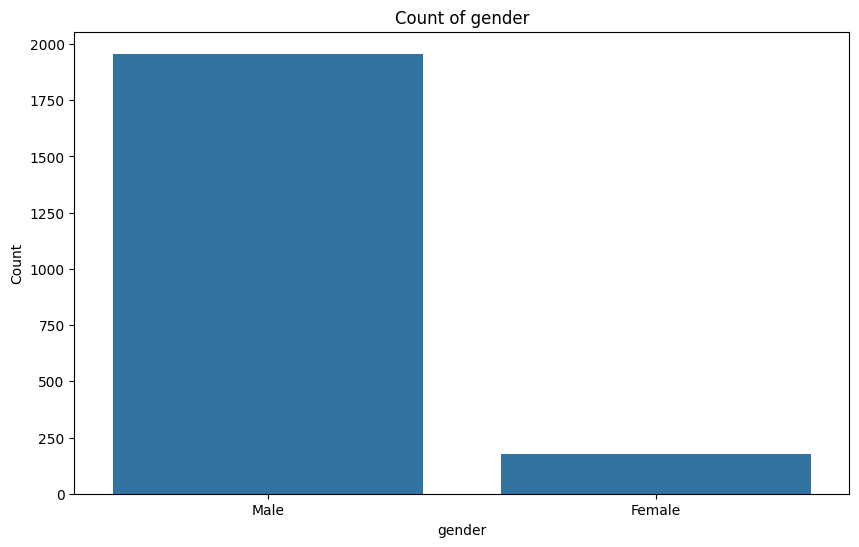

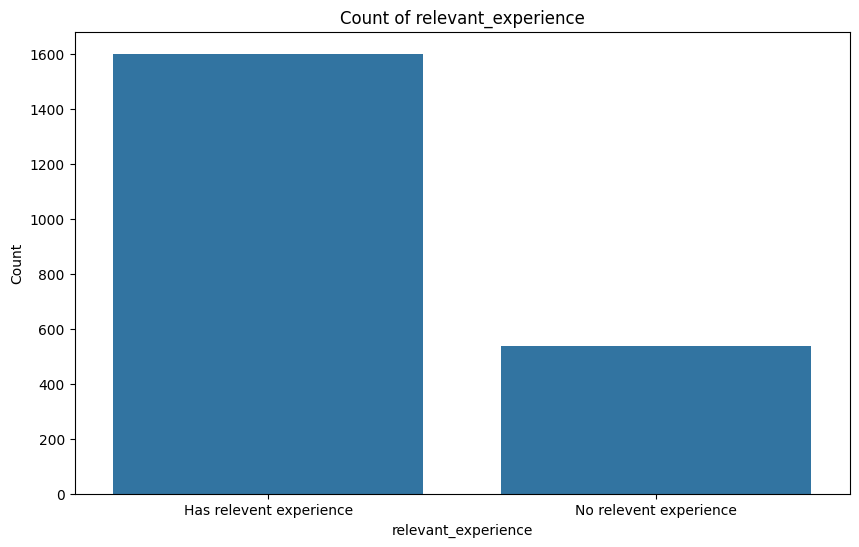

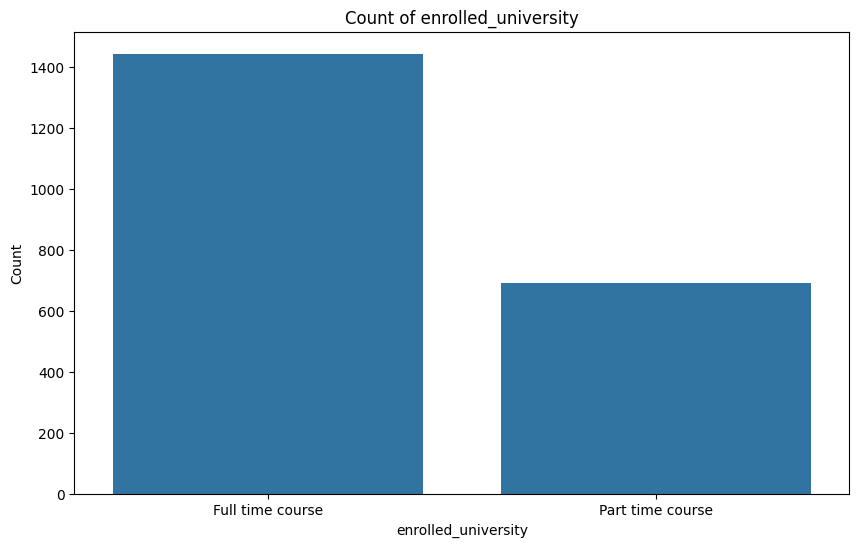

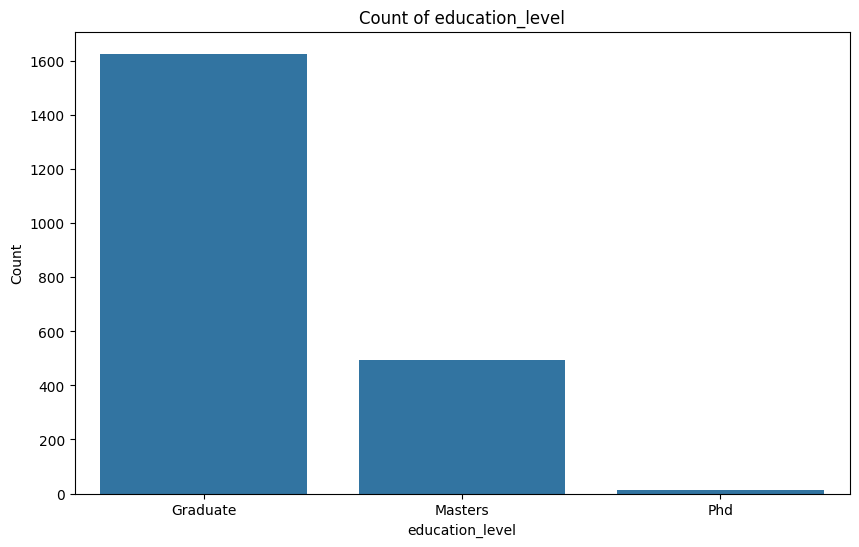

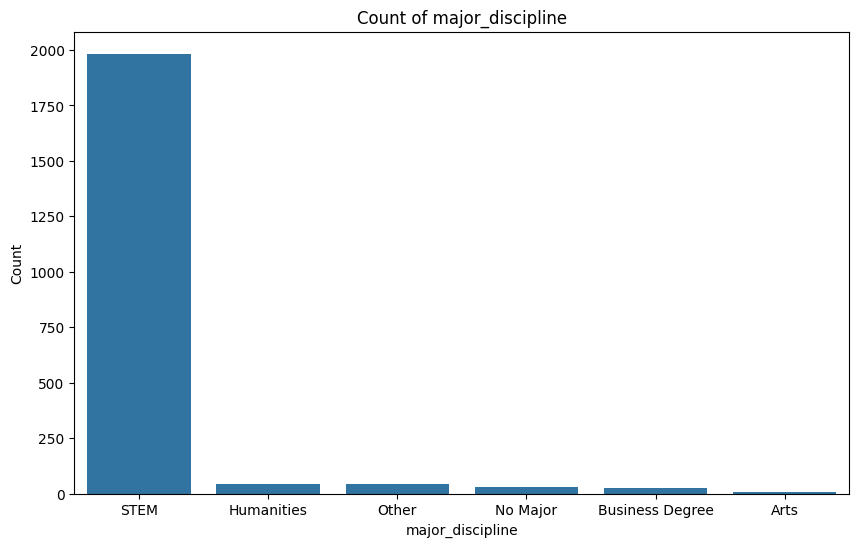

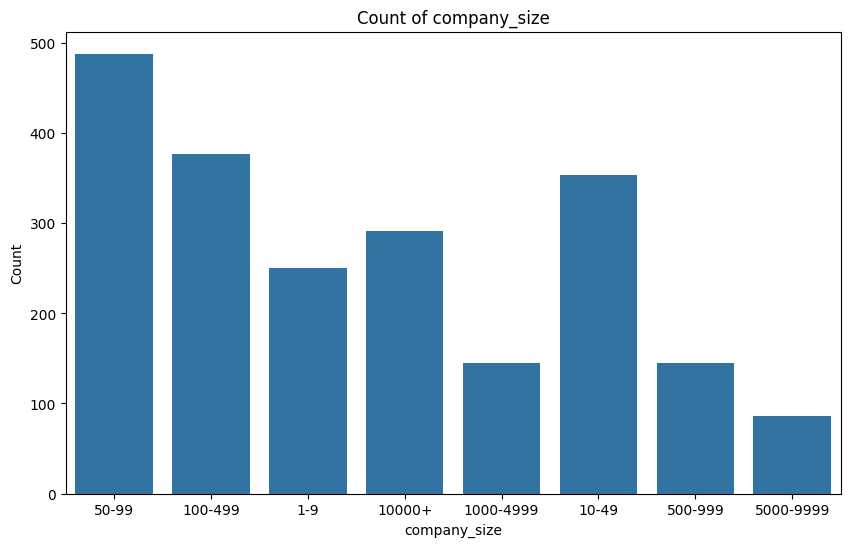

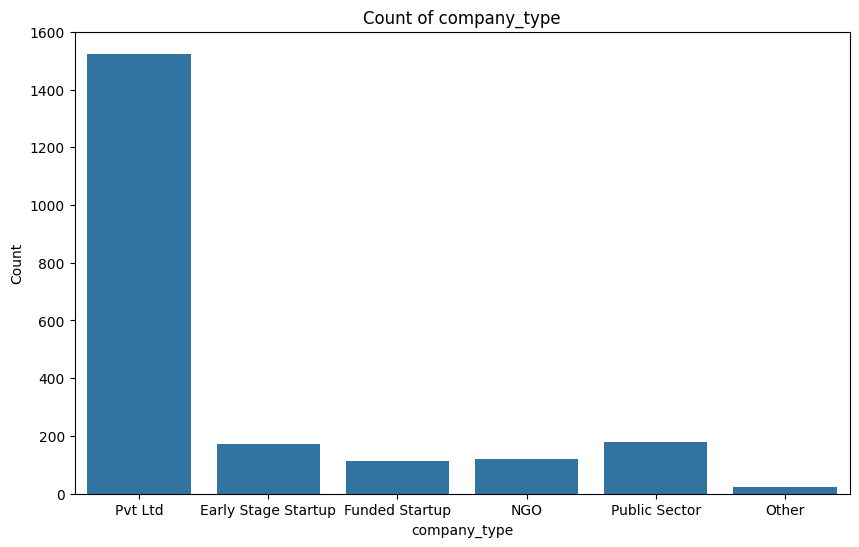

In [ ]:
# Count plot for categorical features to visualize the number of data samples
categorical_features = ['gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')


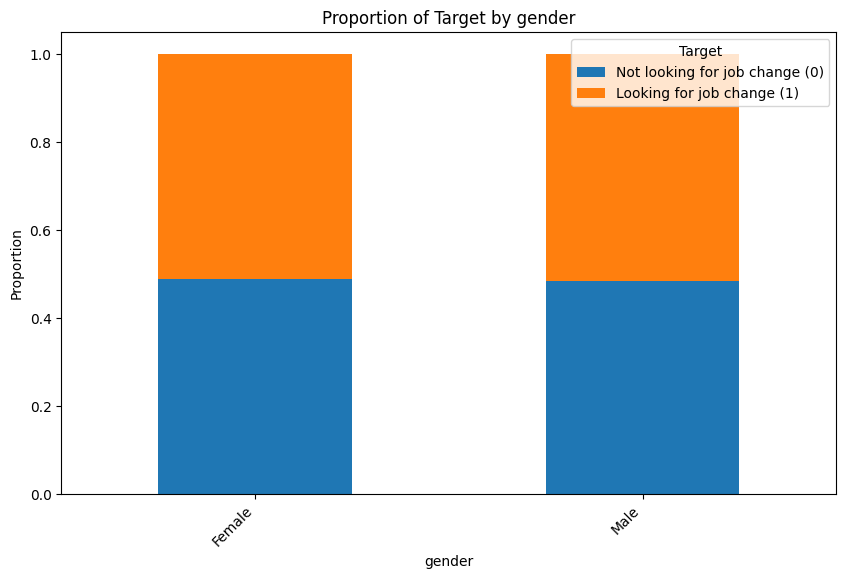

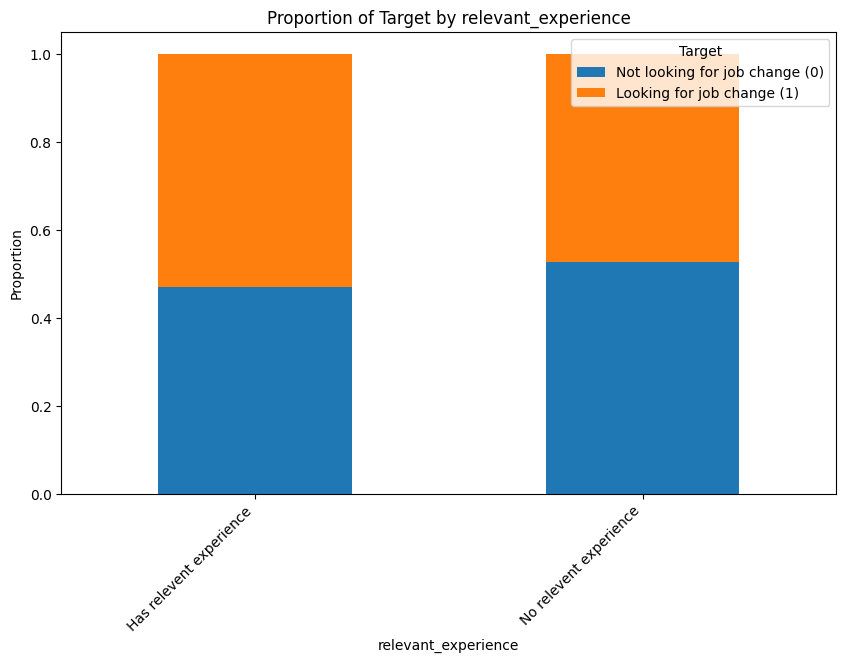

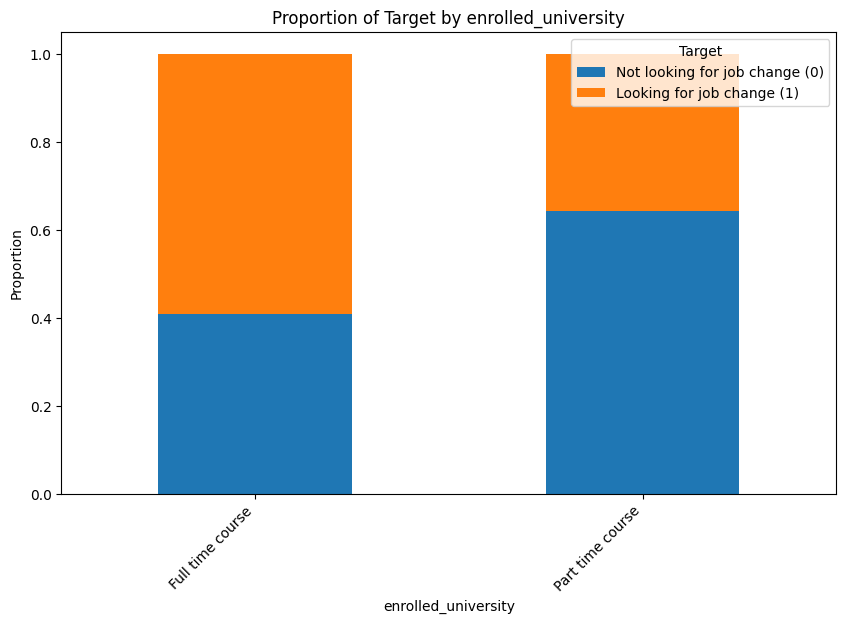

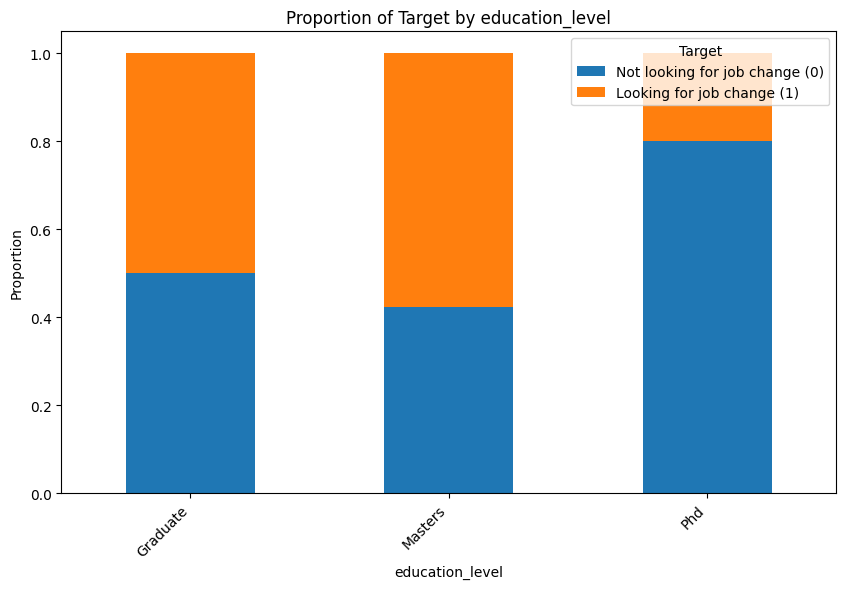

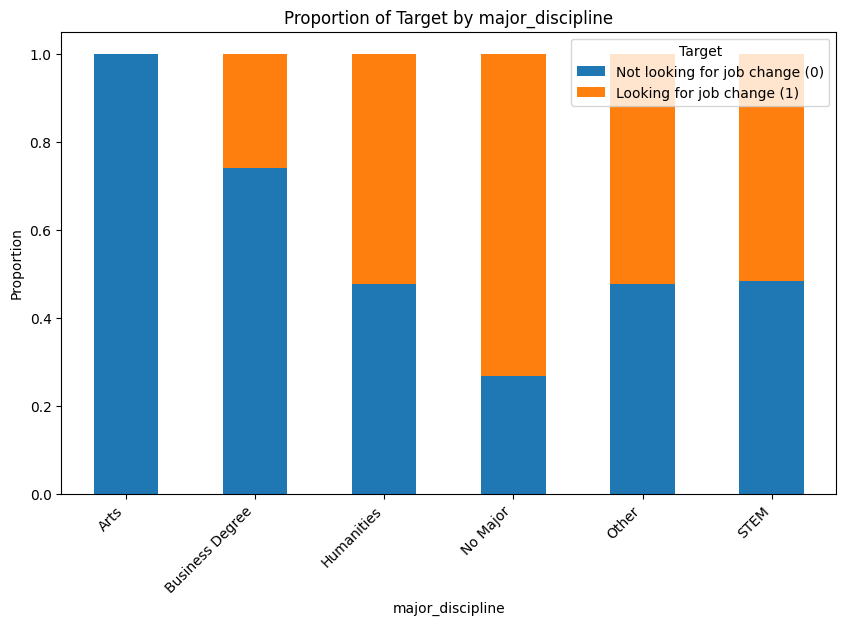

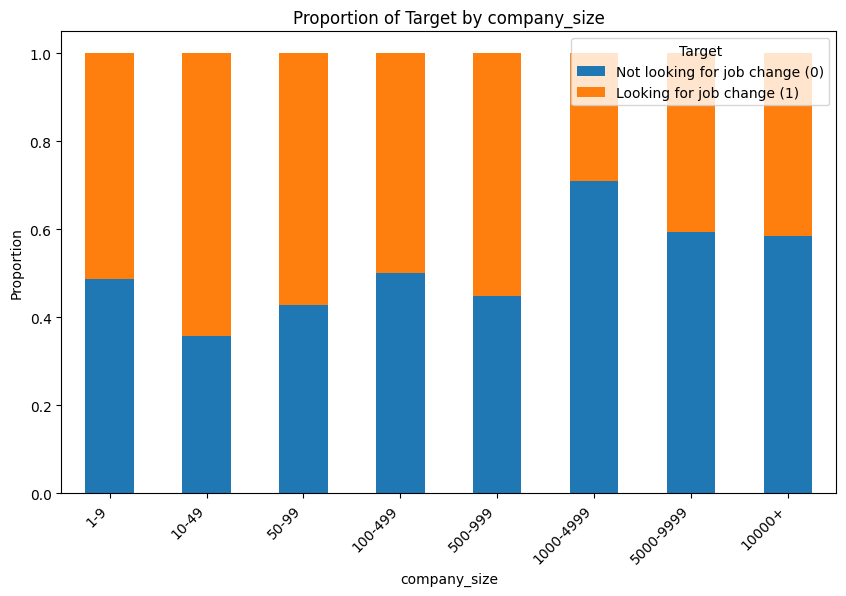

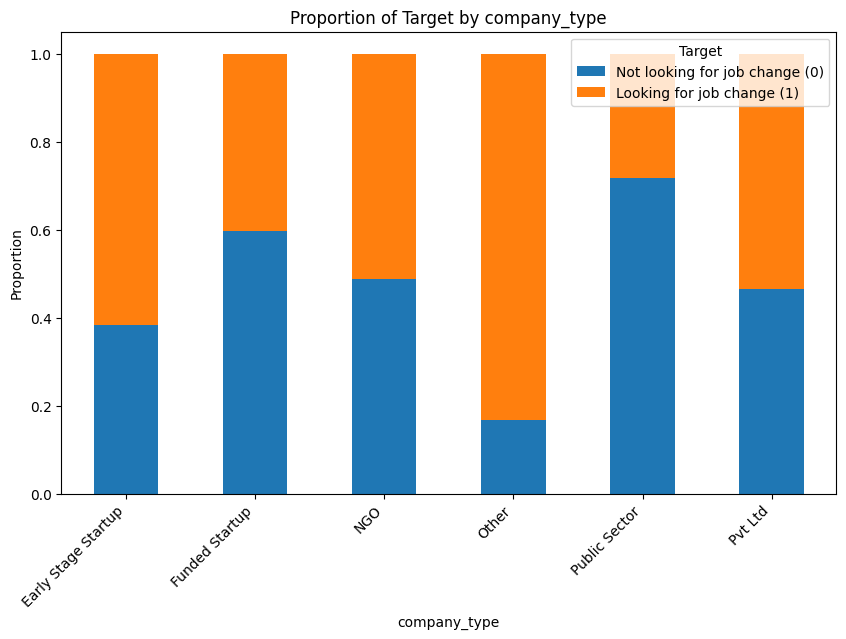

In [ ]:
# Stacked bar chart (100%) for categorical features to show proportions by target
categorical_features = ['gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'] # Exclude 'target' from features to plot against itself

for feature in categorical_features:
    plt.figure(figsize=(10, 6))

    # Calculate proportions
    prop_df = data.groupby(feature)['target'].value_counts(normalize=True).unstack()

    if feature == 'company_size':
        order = ['1-9', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+']
        if all(col in prop_df.columns for col in [0.0, 1.0]):
            prop_df = prop_df.reindex(index=order)
            prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
        else:
             # Handle cases where only one target class exists for a category
            prop_df = prop_df.reindex(index=order)
            prop_df.plot(kind='bar', stacked=True, ax=plt.gca())


    else:
        if all(col in prop_df.columns for col in [0.0, 1.0]):
             prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
        else:
             # Handle cases where only one target class exists for a category
             prop_df.plot(kind='bar', stacked=True, ax=plt.gca())


    plt.title(f'Proportion of Target by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='Target', labels=['Not looking for job change (0)', 'Looking for job change (1)'])
    plt.show()

## Data Analysis
Based on the visualizations:

**From histogram distribution:**
- **City_development_index:** The distribution shows two peaks, suggesting a bimodal distribution. The negative correlation with the target variable in the heatmap implies that candidates from cities with *lower* development indices might be more likely to look for a job change.
- **Experience:** The distribution is left-skewed, with a peak at lower experience levels. The negative correlation with the target suggests that less experienced candidates might be more inclined to seek new job opportunities.
- **Training_hours:** The distribution is heavily skewed towards lower training hours. The correlation with the target is low.
- **Last_new_job:** The histogram appears scattered due to the discrete nature of the data (specific year differences). The correlation with the target is low.

**From correlation heatmap:**
- The correlation heatmap confirms the negative correlation between city_development_index and target, and experience and target.
- last_new_job and training_hours show a low correlation with the target feature.

**From count plots and stacked bar charts:**
- **Gender:** The count plot shows a class imbalance (more males than females). The stacked bar chart indicates little difference in the proportion of job changes between genders, but this should be interpreted cautiously due to the class imbalance.
- **Relevant_experience:** The plots show the distribution of relevant experience and the proportion of job changes within each category.
- **Enrolled_university:** The stacked bar chart suggests that individuals enrolled in 'Full time course' are more likely to look for a job change compared to other categories.
- **Education_level:** The stacked bar chart indicates that 'Masters' and 'Graduates' are more likely to seek job changes. The count of 'Phd' is low, highlighting a class imbalance issue for this category.
- **Major_discipline:** The count plot shows that 'STEM' is the overwhelming majority. This class imbalance needs to be considered when interpreting the stacked bar chart for major discipline.
- **Company_size and Company_type:** The plots show the distribution of candidates across different company sizes and types, and the stacked bar charts illustrate the proportion of job changes within these categories. Class imbalance is also evident in these features.

**Implications for next steps:**
The analysis reveals class imbalance in several categorical features. This reinforces the need for resampling techniques, such as SMOTE, to balance the dataset before training the model to avoid biased predictions, as planned in the next section.

## 1.2. Apply Resampling technique to balance the class

In [ ]:
pip install imbalanced-learn scikit-learn;


In [ ]:
# Data preparation: splitting the data into training and testing sets before applying SMOTE to prevent data leakage and ensure a realistic evaluaion of the model
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Identify categorical features (excluding 'enrollee_id' which is an identifier)
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a column transformer to apply one-hot encoding to categorical features
# 'passthrough' leaves the numerical columns untouched
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Apply the one-hot encoding to the training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (1708, 34)
Shape of X_test_encoded: (427, 34)


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)


In [ ]:
# Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       198
         1.0       0.90      0.86      0.88       229

    accuracy                           0.88       427
   macro avg       0.88      0.88      0.88       427
weighted avg       0.88      0.88      0.88       427



From the classification report on the performance of Random Forest model on the test set:
- Precision: For class 0 (not looking for a job change). This means that when the model predicts a candidate is not looking for a job change, it is correct 85% of the time. For class 1 (looking for a job change), the precision is 0.90, meaning 90% of the candidates the model predicts as looking for a job change actually are.

- Recall:  For class 0, the recall is 0.89. This means the model correctly identifies 89% of all candidates who are not looking for a job change. For class 1, the recall is 0.86, meaning the model correctly identifies 86% of all candidates who are looking for a job change.

- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. For class 0, the F1-score is 0.87, and for class 1, it's 0.88. These scores indicate a good balance between precision and recall for both classes.

- Support: This is the number of actual instances in the test set for each class. There are 198 candidates in the test set who are not looking for a job change (class 0) and 229 candidates who are looking for a job change (class 1).

- Accuracy:  This is the number of actual instances in the test set for each class. There are 198 candidates in the test set who are not looking for a job change (class 0) and 229 candidates who are looking for a job change (class 1).

- Macro avg: This is the average of the precision, recall, and f1-score across both classes, without considering the class imbalance.

- Weighted avg: This is the average of the precision, recall, and f1-score across both classes, weighted by the support of each class.

To sum up, the model shows good performance for both classes, with slightly higher precision for predicing job changes and slightly higher recall for predicting non-job changes. The overall accuracy and F1-scores indicate a well-performing model.





## 1.3 Find the best set of hyperparemeters for both Decision Tree and Random Forest model

In [31]:
# Use Grid Search to find the best hyperparameters for both decision Tree and Random Forest
# Import necessary library packages
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Decision Tree and Random Forest

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# For Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Perform Grid Search with Cross-Validation
    # For Decision Tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_encoded, y_train)

    # For Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train_encoded, y_train)






GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [32]:
# For Decision Tree
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
best_dt_model = dt_grid_search.best_estimator_

# For Random Forest
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


From the hyperparametes for Decision Tree:
- criterion: 'gini': This means the best model uses the Gini impurity to measure the quality of a split.  Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled.
- max_depth: 10: The optimal maximum depth of the tree is 10. This limits how many splits the tree can make, helping to prevent overfitting. A deeper tree could capture more complex relationship, but could also overfit to the training data.
- min_samples_leaf: 4: The minimum number of samples required to be at a leaf node is 4. This rule helps to smooth the model and prevents creating leaves with very few samples.
- min_samples_split: The minimum number of samples required to split an internal node is 5. This condition ensures that splits are only considered when there are enough samples in a node, which helps to prevent the tree from being too complex and potentially overfitting.

These parameters suggest that a moderately deep Decision Tree with some constraints on splitting and leaf size performs best on your data.

From the hyperparameters for Random Forest:
- bootstrap: False: This indicates that the best Random Forest model does not use bootstrapping (sampling with replacement) when creating the trees. Each tree is trained on the entire dataset.
- max_depth: None: There is no limit on the maximum depth of the individual trees in the forest. The trees will expand until all leaves are pure or until min_samples_split or min_samples_leaf are met.
- min_samples_leaf: 1: The minimum number of samples required to be at a leaf node is 1.
- min_samples_split: 2: The minimum number of samples required to split an internal node is 2.
- n_estimators: 200: The best model uses 200 trees in the forest. A higher number of estimators generally improves performance but also increases computation time.

In [ ]:
# Train the best hyperparameters on the final Decision Tree and Random Forest models using the SMOTE-resampled training data
best_dt_model = DecisionTreeClassifier(criterion=dt_grid_search.best_params_['criterion'],
                                       max_depth=dt_grid_search.best_params_['max_depth'],
                                       min_samples_leaf=dt_grid_search.best_params_['min_samples_leaf'],
                                       min_samples_split=dt_grid_search.best_params_['min_samples_split'],
                                       random_state=42)

best_rf_model = RandomForestClassifier(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                       max_depth=rf_grid_search.best_params_['max_depth'],
                                       min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                       min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
                                       bootstrap=rf_grid_search.best_params_['bootstrap'],
                                       random_state=42)


best_dt_model.fit(X_train_resampled, y_train_resampled)
best_rf_model.fit(X_train_resampled, y_train_resampled)

In [33]:
# Classification report
y_pred_dt = best_dt_model.predict(X_test_encoded)
y_pred_rf = best_rf_model.predict(X_test_encoded)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       198
         1.0       0.88      0.74      0.80       229

    accuracy                           0.81       427
   macro avg       0.82      0.81      0.81       427
weighted avg       0.82      0.81      0.81       427


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       198
         1.0       0.92      0.85      0.89       229

    accuracy                           0.88       427
   macro avg       0.88      0.89      0.88       427
weighted avg       0.89      0.88      0.88       427



Comparing the Random Forest classification reports before and after hyperparameter tuning (both trained on SMOTE-resampled data):

*   The performance metrics (precision, recall, F1-score, accuracy) are very similar.
*   Hyperparameter tuning with GridSearchCV on this dataset and model did not lead to a significant improvement over the default parameters when evaluated on the test set.
*   This suggests that the Random Forest model with default parameters, trained on balanced data, was already performing effectively for this task.

However, we still proceeds with training the data on the best set of hyperparameters for the sake of a rigorous and standardized approach.

## 1.4. Identify the most important feature contributing to job changing predictors and visualize them.

,Importance
remainder__city_development_index,0.316428
remainder__experience,0.128182
remainder__enrollee_id,0.121870
remainder__training_hours,0.107361
remainder__last_new_job,0.059741
cat__enrolled_university_Part time course,0.019214
cat__enrolled_university_Full time course,0.018726
cat__company_size_100-499,0.016659
cat__relevant_experience_No relevent experience,0.013333
cat__company_size_10-49,0.012987


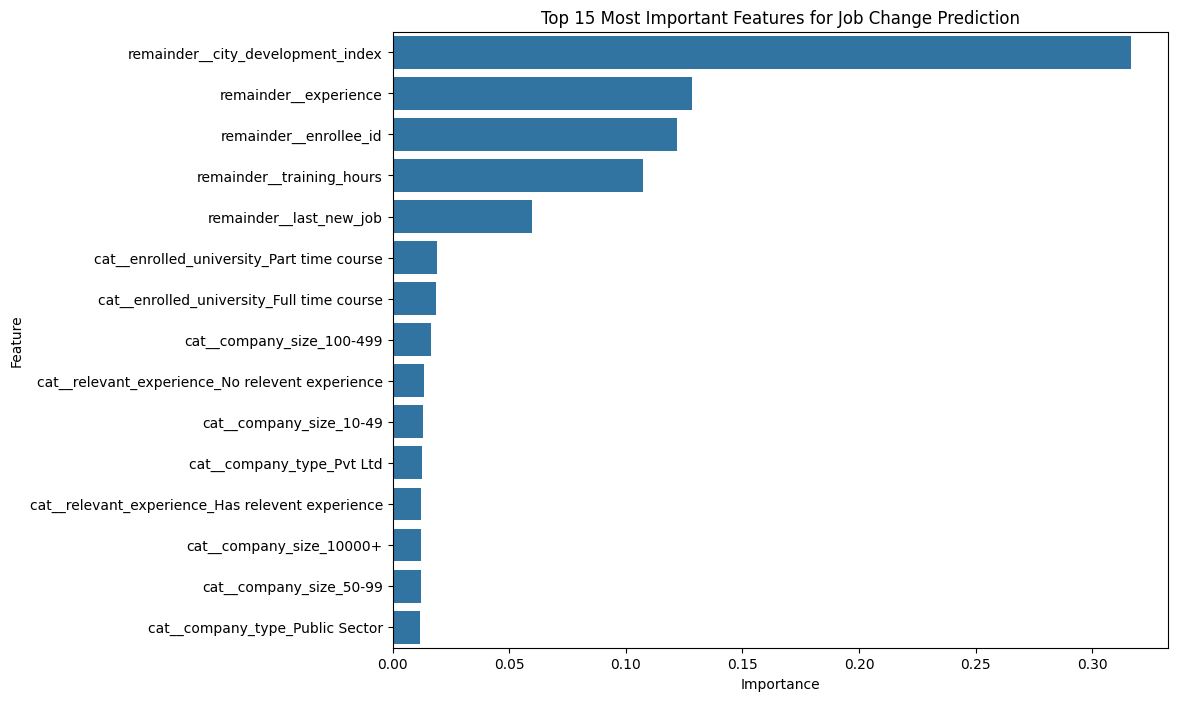

In [35]:
# Identify the most important feature contributing job change predictors
feature_importance = best_rf_model.feature_importances_

# Get feature names after one-hot encoding
# The get_feature_names_out() method is available on the fitted ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Return into dataframe to make it more interpretable
feature_importance_df = pd.DataFrame(feature_importance, index=feature_names, columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance dataframe
display(feature_importance_df)

# Visualize the top N most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y=feature_importance_df.head(15).index, data=feature_importance_df.head(15)) # Display top 15 features
plt.title('Top 15 Most Important Features for Job Change Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Comment on Feature Importance:**

Based on the Random Forest model's feature importance analysis (visualized above), the most important features for predicting whether a candidate is looking for a job change are:

*   **City Development Index:** This feature has the highest importance, indicating that the development level of a city is a significant predictor of job change.
*   **Experience:** The candidate's total years of experience is also a highly important feature.
*   **Enrollee ID:** Although an identifier, its high importance suggests it might be capturing underlying patterns or be correlated with other unmeasured factors. This warrants further investigation.
*   **Training Hours:** The number of training hours completed is another influential numerical feature.
*   **Last New Job:** The time difference between the previous and current job is also among the more important features.

Among the categorical features (after one-hot encoding), enrolled_university, company_size, and relevant_experience show notable importance, aligning with the initial data analysis observations.

## 1.5. Patterns of the Decision Tree

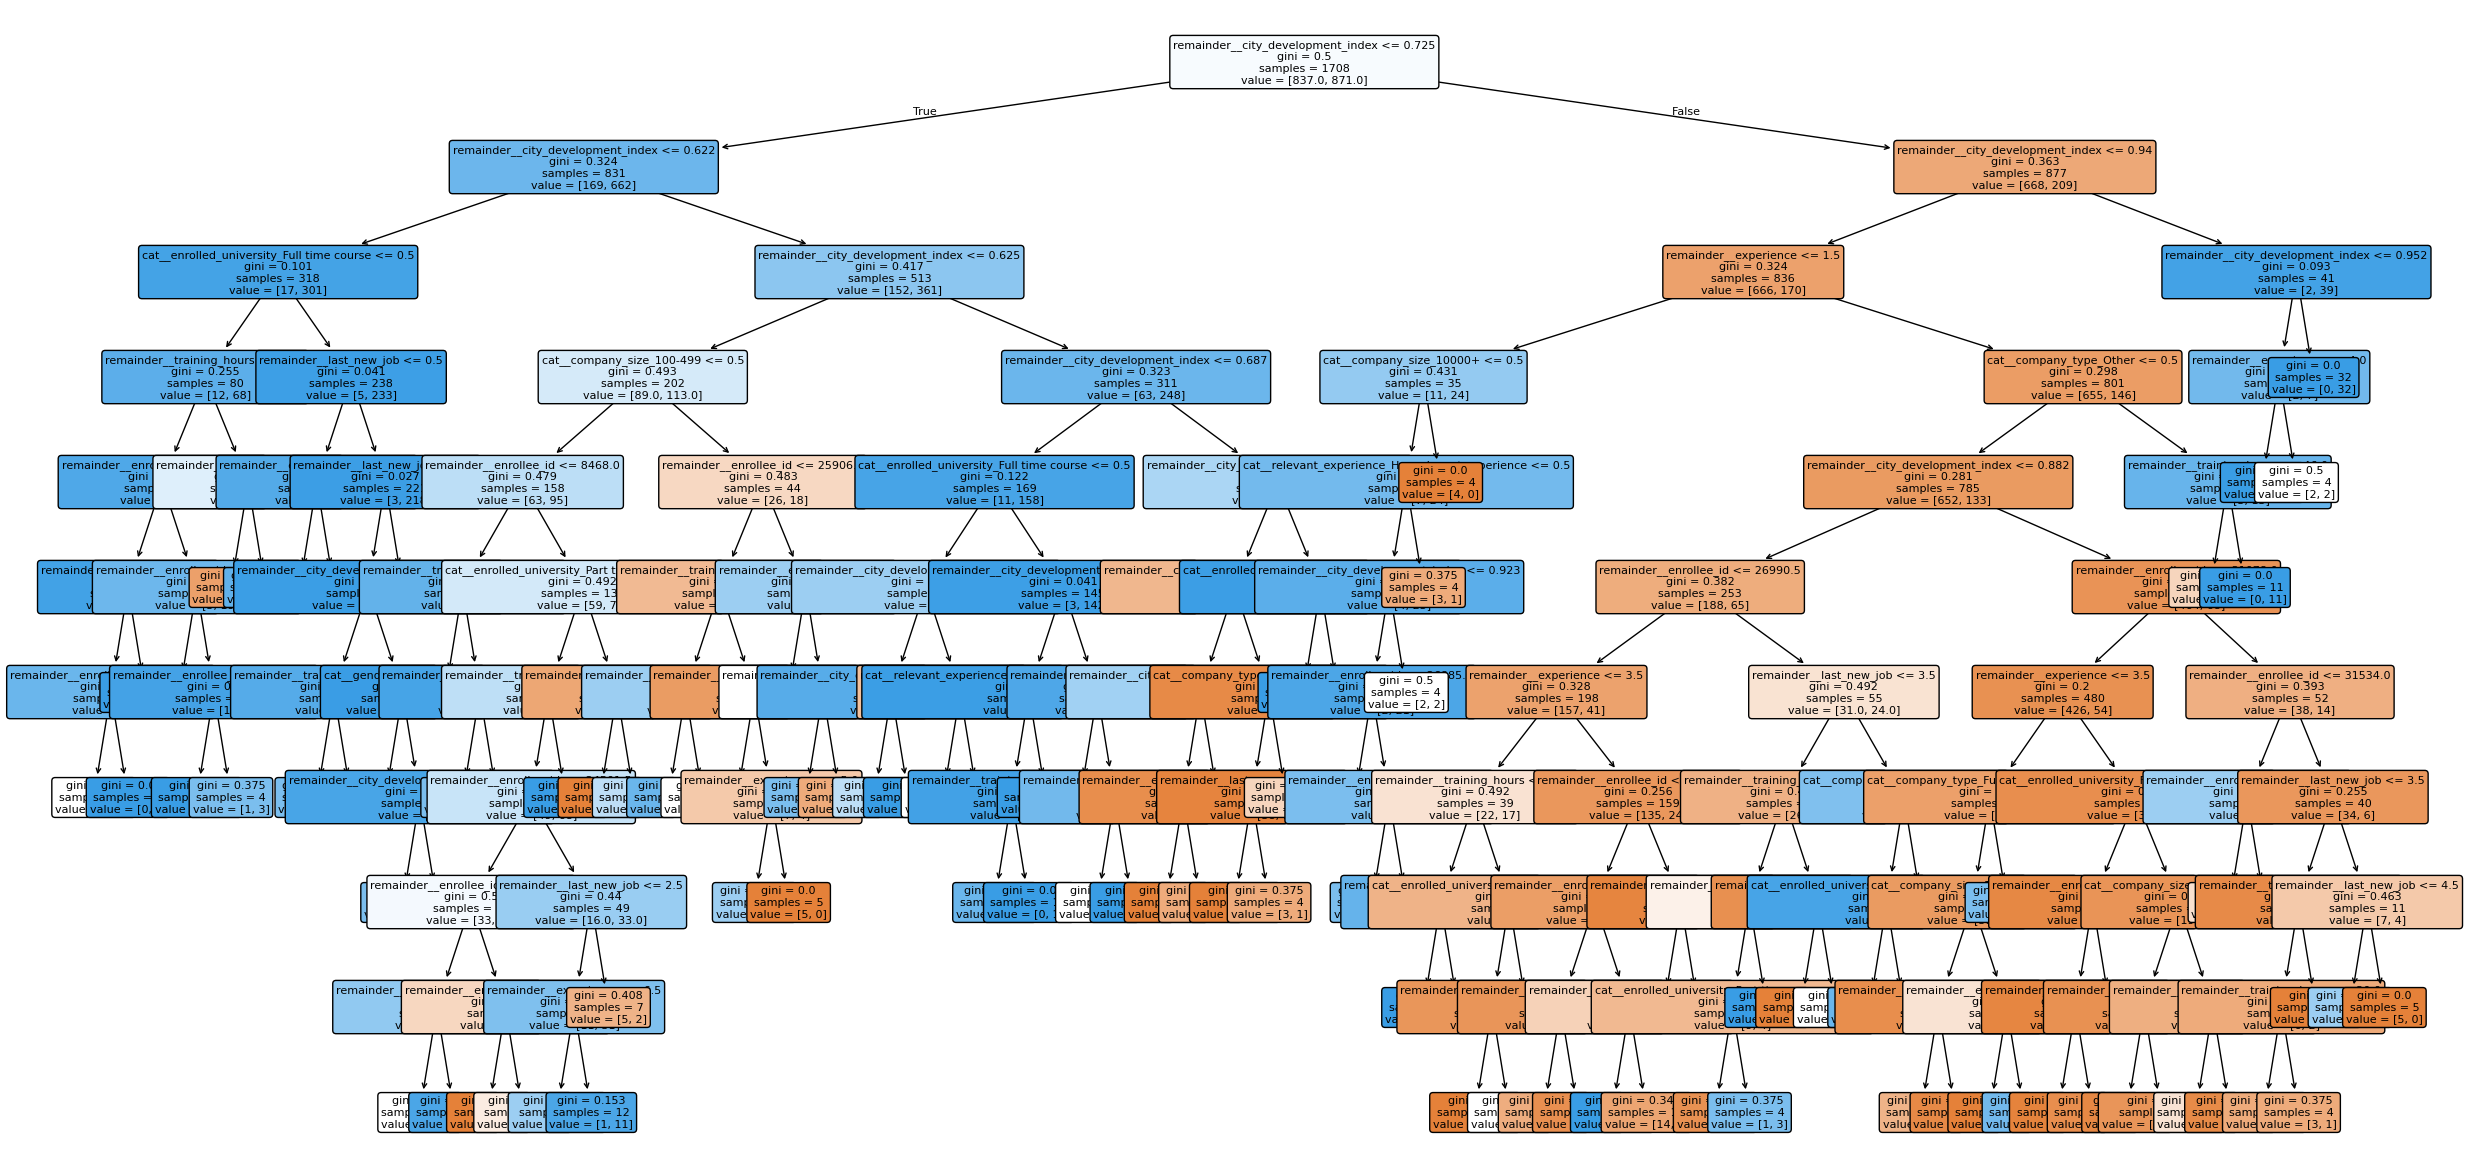

In [34]:
# Already trained the Decision Tree, now just visualize the resulting tree structure
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15)) # Increased figure size
plot_tree(best_dt_model, feature_names=feature_names, filled=True, rounded=True, fontsize=8) # Increased fontsize for better readability
plt.show()

**Comment on Decision Tree Structure:**

Looking at the visualization of the Decision Tree, some of the initial splits appear intuitive and align with the feature importance analysis. For example, 'city_development_index' and 'experience' are among the top features used for splitting near the root of the tree. This makes sense as they were identified as highly important predictors.

Each node in the tree represents a decision point. Let's break down what we see in each node:

*   The top line shows the splitting condition (e.g., `city_development_index <= 0.8`). If this condition is true, we follow the left branch; otherwise, we follow the right branch.
*   `gini` (or `entropy`) is the impurity measure of the node. A lower value indicates a purer node (more samples of a single class).
*   `samples` is the number of training samples in that node.
*   `value` is the distribution of target classes in that node (e.g., `[number of samples with target 0, number of samples with target 1]`).
*   `class` is the predicted class for the majority of samples in that node.

However, interpreting the deeper parts of the tree can become less intuitive as the splits involve combinations of features and specific threshold values. It's hard to extract simple, easily explainable "rules" from a complex tree with many nodes and branches that apply broadly.

One potentially surprising aspect might be how certain categorical features, after one-hot encoding, contribute to splits deep within the tree, especially when they interact with numerical features. Without examining every node and path, it's difficult to pinpoint specific "surprising" rules, but the complexity itself can be surprising if we're expecting a simple, easily interpretable set of rules.

The tree visualization is helpful for understanding the hierarchical decision-making process of a single tree, but the sheer number of nodes and the specific split points can make it challenging to translate into simple, human-readable rules for every prediction even after best hyperparameter tuning. The strength of a Random Forest, in contrast, comes from the collective intelligence of many such trees, rather than the interpretability of a single one.

To examine the tree more closely, we can zoom in on the plot. Each node shows the splitting condition, the gini impurity (or entropy), the number of samples in that node, and the distribution of classes.

The Random Forest model generally performed better than the Decision Tree model across most metrics.

Accuracy: The Random Forest model had a higher accuracy (0.88) compared to the Decision Tree model (0.82).
Precision and Recall for Class 0 (Not looking for job change): Both models had similar recall for class 0 (around 0.90), but the Random Forest had higher precision (0.84 vs 0.75). This means the Random Forest was better at correctly identifying those not looking for a job change, with fewer false positives.
Precision and Recall for Class 1 (Looking for job change): The Random Forest model had higher precision (0.92 vs 0.90) and recall (0.85 vs 0.75) for class 1. This is a significant improvement, as the Random Forest was better at both correctly identifying those looking for a job change and having fewer false negatives.
F1-score: The F1-scores for both classes were higher for the Random Forest model (0.87 and 0.88) compared to the Decision Tree (0.82 and 0.81), indicating a better balance between precision and recall.
This result was expected. Random Forests are an ensemble method that combines multiple decision trees. By averaging the predictions of multiple trees, Random Forests typically reduce overfitting and improve generalization compared to a single decision tree, especially on complex datasets. The bagging nature of Random Forests helps to reduce variance, leading to a more robust model.

# Part 2: Discussion


## 2.1  Which features in the dataset do you think are most important for predicting job changes? Did the feature importance analysis confirm your expectations?

Based on the initial data analysis (histograms and countplots), we expected features like city_development_index, experience, relevant_experience, enrolled_university, and company_size to be important predictors of job change.

The feature importance analysis from the Random Forest model largely confirmed these expectations, with city_development_index and experience being the top two most important features. enrollee_id also appeared high on the list, which is interesting as it's an identifier and might be capturing underlying patterns or be correlated with other unmeasured factors. This warrants further investigation. training_hours and last_new_job were also important numerical features.

Among the categorical features (after one-hot encoding), enrolled_university, company_size, and relevant_experience show notable importance, aligning with the initial data analysis observations.

The feature importance analysis provided a more quantitative ranking of the features' contributions to the model's predictions, which was helpful in confirming and refining the initial hypotheses.

## 2.2 Compare the performance of Decision Tree model and Random Forest model




The Random Forest model generally performed better than the Decision Tree model across most metrics.

- Accuracy: The Random Forest model had a higher accuracy (0.88) compared to the Decision Tree model (0.82).
- Precision and Recall for Class 0 (Not looking for job change): Both models had similar recall for class 0 (around 0.90), but the Random Forest had higher precision (0.84 vs 0.75). This means the Random Forest was better at correctly identifying those not looking for a job change, with fewer false positives.
- Precision and Recall for Class 1 (Looking for job change): The Random Forest model had higher precision (0.92 vs 0.90) and recall (0.85 vs 0.75) for class 1. This is a significant improvement, as the Random Forest was better at both correctly identifying those looking for a job change and having fewer false negatives.
- F1-score: The F1-scores for both classes were higher for the Random Forest model (0.87 and 0.88) compared to the Decision Tree (0.82 and 0.81), indicating a better balance between precision and recall.

This result was expected. Random Forests are an ensemble method that combines multiple decision trees. By averaging the predictions of multiple trees, Random Forests typically reduce overfitting and improve generalization compared to a single decision tree, especially on complex datasets. The bagging nature of Random Forests helps to reduce variance, leading to a more robust model.

In [36]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       198
         1.0       0.88      0.74      0.80       229

    accuracy                           0.81       427
   macro avg       0.82      0.81      0.81       427
weighted avg       0.82      0.81      0.81       427


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       198
         1.0       0.92      0.85      0.89       229

    accuracy                           0.88       427
   macro avg       0.88      0.89      0.88       427
weighted avg       0.89      0.88      0.88       427



## 2.3  When visualizing the Decision Tree, were the splits and decisions intuitive? Did you notice any surprising decision rules?


Looking at the visualization of the Decision Tree, some of the initial splits appear intuitive and align with the feature importance analysis. For example, city_development_index and experience are among the top features used for splitting near the root of the tree. This makes sense as they were identified as highly important predictors.

However, interpreting the deeper parts of the tree can become less intuitive as the splits involve combinations of features and specific threshold values. It's hard to extract simple, easily explainable "rules" from a complex tree with many nodes and branches.

One potentially surprising aspect might be how certain categorical features, after one-hot encoding, contribute to splits deep within the tree, especially when they interact with numerical features. Without examining every node and path, it's difficult to pinpoint specific "surprising" rules, but the complexity itself can be surprising if you're expecting a simple, easily interpretable set of rules.

The tree visualization is helpful for understanding the hierarchical decision-making process of a single tree, but the sheer number of nodes and the specific split points can make it challenging to translate into simple, human-readable rules for every prediction. The strength of a Random Forest, in contrast, comes from the collective intelligence of many such trees, rather than the interpretability of a single one.


## 2.4 Applications of the predicition model for a company's hiring and retention strategy.

A company could leverage a predictive model like this in several ways to enhance their hiring and retention strategies:

Benefits:

- Targeted Recruitment: Identify candidates from the training program who are predicted to be more likely to look for a job change. This allows the company to prioritize engagement with these individuals, potentially offering them full-time positions or accelerated career paths to retain them.
- Improved Retention: By understanding the factors that contribute to employees looking for job changes (based on the feature importance), the company can proactively address these issues within their existing workforce. For example, if "experience" and "city development index" are significant factors, the company might consider offering more growth opportunities or competitive compensation in high-development areas to retain experienced employees.
- Resource Allocation: The model can help allocate resources more effectively. Instead of broadly engaging with all training program participants, the company can focus its efforts on those with a higher predicted likelihood of seeking a job change, potentially saving time and money.
- Identifying at-risk employees: Applying a similar model to their existing employees could help identify those at a higher risk of leaving, allowing for targeted retention efforts such as mentorship programs, skill development opportunities, or addressing concerns about company size or type.

Risks:

- Bias in Data: If the training data contains biases (e.g., underrepresentation of certain demographics), the model may perpetuate or even amplify these biases in its predictions. This could lead to unfair or discriminatory practices in hiring and retention. It's crucial to be aware of potential biases in the data and model and take steps to mitigate them.
Ethical Concerns: Using a model to predict job changes raises ethical questions about privacy and fairness. Candidates or employees might feel their career intentions are being unfairly judged or used against them. Transparency and careful consideration of how the model's predictions are used are essential.
- Model Accuracy Limitations: No model is perfect. Relying solely on the model's predictions without human judgment can lead to incorrect decisions. Some candidates predicted to leave might stay, and some predicted to stay might leave. The model should be used as a tool to inform decisions, not replace human evaluation entirely.
- Dynamic Nature of Job Market: The factors influencing job changes can evolve over time due to economic conditions, industry trends, and individual circumstances. A model trained on historical data might not remain accurate indefinitely and would require periodic retraining and validation.
Focusing on Prediction vs. Underlying Issues: While the model can predict who is likely to leave, it doesn't necessarily explain why they are looking for a job change at an individual level. Companies need to combine predictive modeling with qualitative methods (like exit interviews and employee feedback) to understand the root causes of attrition and develop effective retention strategies.

## 2.5 Insightful or difficult Part of the Projects and additional improvements.


Most Difficult/Insightful Part:

 - One of the most insightful parts of this assignment was seeing how the feature importance analysis from the Random Forest model quantitatively supported or challenged the initial intuitions about which features were important for predicting job changes. While some features like city_development_index and experience were expected to be significant, the specific ranking and the importance of features like enrollee_id (even though it's an identifier, it might be correlated with other unmeasured factors) and the nuances of how different categories within features like enrolled_university and company_size contributed to the prediction were particularly insightful.

- The most challenging aspect was likely the process of hyperparameter tuning using GridSearchCV. While it's a powerful technique, setting up the parameter grids and understanding the impact of different hyperparameters on the model's performance can be complex. Interpreting the results of the grid search and deciding whether the improvements in performance justify the increased computational cost is also a key consideration in real-world scenarios.

Additional Improvements:

If I had more time, here are some additional improvements I would make:

- More Extensive Feature Engineering: Explore creating new features from existing ones. For example, combining education level and major discipline, or creating interaction terms between relevant experience and company size.
Investigate enrollee_id: The high importance of enrollee_id is suspicious. I would investigate if this is due to some data leakage or if the ID is somehow correlated with other unmeasured factors. It might be necessary to remove this feature or explore alternative ways to handle it.
- Explore Other Resampling Techniques: While SMOTE was used, I would explore other oversampling or undersampling techniques (e.g., ADASYN, NearMiss) and compare their impact on model performance.
Evaluate Other Models: Train and evaluate other classification models, such as Gradient Boosting Machines (like XGBoost or LightGBM), Support Vector Machines, or even a simple logistic regression as a baseline, to see if they outperform the Random Forest.
- Analyze Misclassifications: Examine the instances where the model made incorrect predictions (false positives and false negatives) to understand if there are any patterns or specific characteristics of these individuals that the model is failing to capture.
- Consider Model Interpretability: While Random Forest performed well, explore more interpretable models or techniques (like SHAP or LIME) to gain deeper insights into why the model is making certain predictions, which can be valuable for business stakeholders.
